<a href="https://colab.research.google.com/github/Cebisad/PIMA-Indian-Diabetes-Prediction/blob/main/PIMA_Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.8 MB 139 kB/s
     |████████████████████████████████| 11.1 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 34.2 MB/s 
     |████████████████████████████████| 102 kB 49.0 MB/s 
     |████████████████████████████████| 690 kB 48.2 MB/s 
     |████████████████████████████████| 4.7 MB 51.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 45.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=fab55241c795d327d7b057252443959fcaad924e81fe4135275d792a3f48ffee
  Stored in directory: /tmp/pip-ephem-wheel-cache-5jo77b7i/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=023f4f880ba031896a92f5d210

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
diabetes = pd.read_csv("diabetes.csv")
dataset = diabetes

In [33]:
file = ProfileReport(dataset)
file.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
#Most of the variables approximate a normal distribution, however, the kurtosis (-3,3) indicates that normality is not confirmed.
#The mean and median show that there is a deviation from normality
#Thus, there is a need to test for normality using Shapiro-Wilk test
#The null hypothesis is that the data is normal, if p-value is less than 5% reject null hypothesis

from scipy.stats import shapiro

In [5]:
stat, p = shapiro(dataset['BloodPressure'])
print('Statistics = %.5f, p = %.5f' % (stat,p))

Statistics = 0.81892, p = 0.00000


In [6]:
#The normality hypothesis is rejected as the pvalue=0.0000 is below 5%

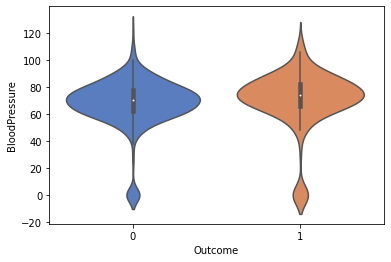

In [7]:
ax = sns.violinplot(x="Outcome", y="BloodPressure", data=dataset, palette="muted", split=True) #classifying BP based on type

In [8]:
#We are replacing the zero values in the data with a median value
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

In [9]:
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))

In [10]:
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

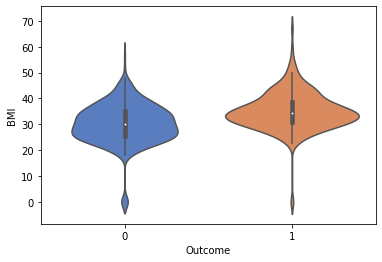

In [11]:
ax = sns.violinplot(x="Outcome", y="BMI", data=dataset, palette="muted", split=True) #classifying BMI based on type

In [12]:
df3 = dataset.loc[dataset['Outcome'] == 1]
df4 = dataset.loc[dataset['Outcome'] == 0]

In [13]:
df3 = df3.replace({'BMI':0}, np.median(df3['BMI']))
df4 = df4.replace({'BMI':0}, np.median(df4['BMI']))

In [14]:
dataframe = [df3, df4]
dataset = pd.concat(dataframe)

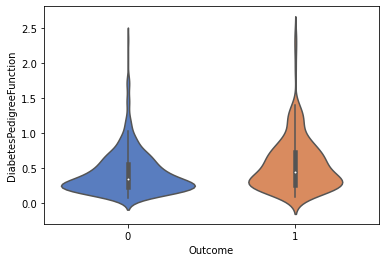

In [15]:
ax = sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=dataset, palette="muted", split=True) #classifying DiabetesPedigreeFunction based on type

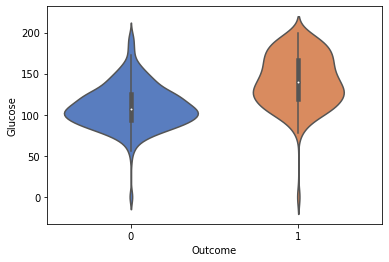

In [16]:
ax = sns.violinplot(x="Outcome", y="Glucose", data=dataset, palette="muted", split=True) #classifying Glucose based on type

In [17]:
df5 = dataset.loc[dataset['Outcome'] == 1]
df6 = dataset.loc[dataset['Outcome'] == 0]

In [18]:
df5 = df5.replace({'Glucose':0}, np.median(df5['Glucose']))
df6 = df6.replace({'Glucose':0}, np.median(df6['Glucose']))

In [19]:
dataframe = [df5, df6]
dataset = pd.concat(dataframe)

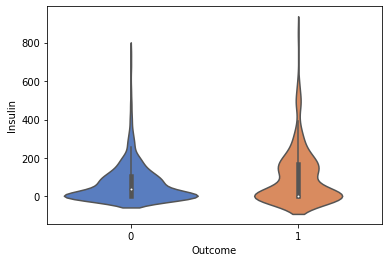

In [20]:
ax = sns.violinplot(x="Outcome", y="Insulin", data=dataset, palette="muted", split=True) #classifying Insulin based on type

In [21]:
df7 = dataset.loc[dataset['Outcome'] == 1]
df8 = dataset.loc[dataset['Outcome'] == 0]

In [22]:
df7 = df7.replace({'Insulin':0}, np.median(df7['Insulin']))
df8 = df8.replace({'Insulin':0}, np.median(df8['Insulin']))

In [23]:
dataframe = [df7, df8]
dataset = pd.concat(dataframe)

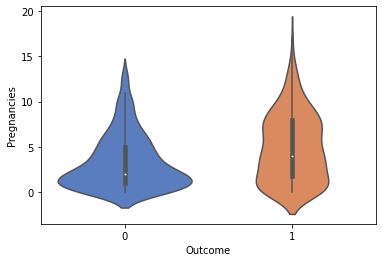

In [24]:
ax = sns.violinplot(x="Outcome", y="Pregnancies", data=dataset, palette="muted", split=True) #classifying Pregnancies based on type

In [25]:
df9 = dataset.loc[dataset['Outcome'] == 1]
df10 = dataset.loc[dataset['Outcome'] == 0]

In [26]:
df9 = df9.replace({'SkinThickness':0}, np.median(df9['SkinThickness']))
df10 = df10.replace({'SkinThickness':0}, np.median(df10['SkinThickness']))

In [27]:
dataframe = [df9, df10]
dataset = pd.concat(dataframe)

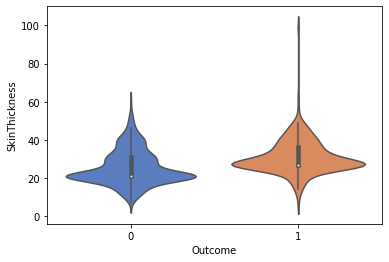

In [28]:
ax = sns.violinplot(x="Outcome", y="SkinThickness", data=dataset, palette="muted", split=True) #classifying SkinThickness based on type

In [29]:
#We now check for Multicollinearity
from scipy.stats import pearsonr

In [30]:
corr, _ = pearsonr(dataset['Age'],dataset['Pregnancies'])
print('Pearson correlation: %.5f' % corr)

Pearson correlation: 0.54434


In [31]:
# The rule of thumb is that r should be above 0.70, the correlation coefficient (r) is: 0.54434

In [32]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,27,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62,21,39,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,39,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [37]:
#splitting data into dependent and independent data
Y = dataset.Outcome
x = dataset.drop('Outcome', axis=1)
columns = x.columns

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [39]:
data_x = pd.DataFrame(X, columns = columns)

In [40]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

In [41]:
#A huge imbalance can be observed in the y_train values. To overcome this problem, we use the SMOTE technique.

In [45]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from imblearn.over_sampling import (SMOTE, RandomOverSampler)

In [49]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [50]:
np.bincount(y_train)

array([430, 430])

In [52]:
#We now have a balanced Training data.
#Our data is now prepared to fit a model
#Fitting logistic regression model to the test data

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75862


In [55]:
#The accuracy for te test data is 75%

In [62]:
#print(f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))

In [60]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = "rbf")
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)

In [63]:
print('Accuracy of SVC (RBF) classifier on test set: {:.5f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.75862


In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = "sqrt")
model.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [66]:
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.5f}'.format(model.score(x_test, y_test)))

Accuracy of Random Forest on test set: 0.84483
